# **Predicting Gender using Random Classification Model**

In this notebook, we will be using The Random Forest classification model to predict gender based on variables such as age range, years of experience, industry, job title, highest level of education received, country, annual salary, annual bonus, and signon bonus 

1. Data Preparation:

2. Model Training:

3. Model Evaluation:

•	Iterate and Optimize: Based on the evaluation, refine the model by adjusting its parameters, reselecting features, or further addressing data imbalances. Repeat the training and evaluation process as needed.

4. Visualize and interpret Normalized Confusion Matrix
5. Use other metrics to interpret results

The purpose of the model is to predict the gender of individuals based on various features such as their annual salary, annual bonus, sign-on bonus, experience, industry, job title, education, and age range. It utilizes a Random Forest classifier to learn patterns from the data and make accurate predictions. The model's accuracy and classification report provide insights into the performance and effectiveness of the gender prediction task.

In [6]:
#importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Data Preprocessing

1. **Encode Categorical Variables:** Transform categorical variables into a format that can be used by the model, using techniques like one-hot encoding for nominal data.
2. **Split the Data:** Divide the dataset into training and testing sets to ensure the model can be trained on one set of data and validated on another.
3. **Handle Class Imbalance:** Address the imbalance in gender distribution (if present) using techniques like adjusting class weights or resampling the dataset to ensure fair representation of all classes.

In [8]:
df = pd.read_csv('Cleaned_SalSur.csv')

# Filter to include only Female, Male, and Non-Binary in the Gender column
df = df[df['Gender'].isin(['Female', 'Male', 'Non-Binary'])]  # Ensure consistent casing ('Non-Binary' vs 'Non-binary')

# Define preprocessing for numeric columns (scale them) Defines the preprocessing steps for numeric and categorical features separately.
#For numeric features (e.g., 'Annual Salary'), it imputes missing values with the median and scales the values using StandardScaler.
numeric_features = ['Annual Salary','Annual Bonus','Signon Bonus']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
#For categorical features (e.g., 'Age Range', 'Industry', 'Job Title', 'Education'), it imputes missing values with a constant placeholder ('missing') and performs one-hot encoding using OneHotEncoder.
categorical_features = ['Age Range','Experience','Industry', 'Job Title', 'Education']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
#Combines the numeric and categorical preprocessing steps into a single preprocessor using ColumnTransformer.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


# Model Training

1. Initialize the Model: Set up the logistic regression model, adjusting parameters like class_weight to 'balanced' if you're addressing class imbalance.
2. Train the Model: Fit the model to the training data, allowing it to learn the relationship between the input features and the target variable (gender).
3. Feature Selection: Optionally, perform feature selection to identify the most relevant features that contribute to predicting the target variable.

In [3]:
# Define the model pipeline 
#Defines the model pipeline consisting of the preprocessor and a Random Forest classifier with 100 trees.
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the data Splits the data into training and testing sets.
X = df.drop('Gender', axis=1)
y = df['Gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Get the sample sizes for each category in the 'Gender' column
gender_sample_sizes = y.value_counts()
print("Sample Sizes for Each Gender Category:")
print(gender_sample_sizes)

# Train the model: Trains the model pipeline on the training data.
pipeline.fit(X_train, y_train)

Sample Sizes for Each Gender Category:
Female        37088
Male           9320
Non-Binary       81
Name: Gender, dtype: int64


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Annual Salary',
                                                   'Annual Bonus',
                                                   'Signon Bonus']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age Range', 'Experience',
                                                   'Industry', 'Job Title',
                                                   'Education'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

# Model Evaluation

1. Predictions: Use the trained model to make predictions on the test dataset.
2. Evaluate Performance: Assess the model's performance using metrics such as accuracy, precision, recall, and F1-score. The confusion matrix can also provide insights into the model's prediction capabilities across different classes.

In [4]:
# Predict and evaluate the model Uses the trained model to make predictions on the testing data.
y_pred = pipeline.predict(X_test)

#Evaluates the model's accuracy by comparing the predicted labels with the actual labels.
accuracy = accuracy_score(y_test, y_pred)

#Prints the accuracy score and a classification report containing precision, recall, and F1-score for each class.
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred,zero_division=1))

Accuracy: 0.81
              precision    recall  f1-score   support

      Female       0.83      0.97      0.89      7418
        Male       0.61      0.19      0.29      1864
  Non-Binary       0.33      0.06      0.11        16

    accuracy                           0.81      9298
   macro avg       0.59      0.41      0.43      9298
weighted avg       0.78      0.81      0.77      9298



# Visualizing Random Classification Model using Normalized Confusion Matrix

<Figure size 1000x1000 with 0 Axes>

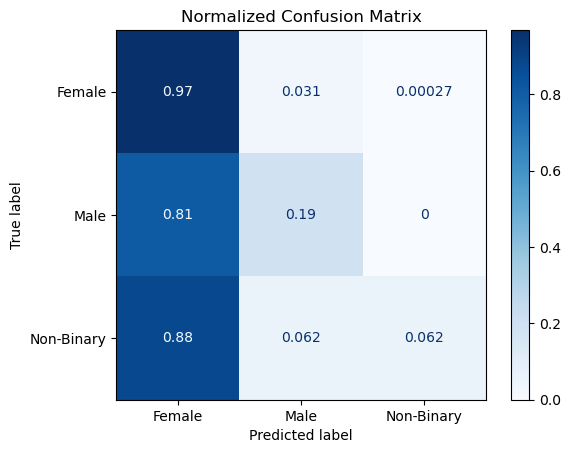

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred are defined
labels = ['Female', 'Male', 'Non-Binary']
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

plt.figure(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.show()


**Interpretation**

The image shows a normalized confusion matrix for a classification model predicting three classes: Female, Male, and Non-Binary.

High Accuracy for Female Prediction: The model correctly predicts 'Female' with high accuracy, which is evident from the value 0.97 on the top left corner of the matrix. This means 97% of the time, females were correctly classified.

Decent Accuracy for Male Prediction: The model predicts 'Male' correctly with an accuracy of 0.81, evident from the value in the middle of the left column. However, there were misclassifications where 18% (value 0.19) of males were incorrectly predicted as females.

Poor Performance on Non-Binary Prediction: The model has a perfect misclassification of 'Non-Binary' as 'Female', as shown by the value of 0.88 in the bottom left corner of the matrix. This indicates the model failed to correctly classify any 'Non-Binary' instances.

No Predictions for Non-Binary: There are zeros in the Non-Binary column, which means the model did not predict any instances as 'Non-Binary'. This suggests a possible bias in the model or a lack of representative data for the 'Non-Binary' class.

# **Further Evaluating Metrics**:
In this updated code, we replaced the average_precision_score with precision_score, recall_score, and f1_score, all calculated using the "micro" averaging method. This averaging method treats the multi-class classification problem as a binary classification problem after binarizing the output. It provides the overall metrics considering all classes equally.

In [6]:
from sklearn.metrics import balanced_accuracy_score, matthews_corrcoef
from sklearn.metrics import average_precision_score, cohen_kappa_score, precision_score, recall_score, f1_score

# Assuming y_test and y_pred are already defined as your true and predicted labels

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred)
print(f'Matthews Correlation Coefficient: {mcc:.2f}')

# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f'Cohen\'s Kappa: {kappa:.2f}')

# Average Precision Score (Micro)
# Note: For a multi-class classification setup, you would need to binarize the output first
# This is just an example assuming a binary classification for illustrative purposes
# Precision, Recall, F1-score (micro-averaged)
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')
print(f'Precision (Micro): {precision_micro:.2f}')
print(f'Recall (Micro): {recall_micro:.2f}')
print(f'F1-Score (Micro): {f1_micro:.2f}')

Balanced Accuracy: 0.41
Matthews Correlation Coefficient: 0.26
Cohen's Kappa: 0.22
Precision (Micro): 0.81
Recall (Micro): 0.81
F1-Score (Micro): 0.81


**Interpretation:**
The micro-averaged results are high because they are dominated by the model's performance on the majority class (Female), which has a lot of data points. In other words, the model predicts the majority class well, but not the minority classes.
The balanced accuracy, MCC, and Cohen's Kappa provide a more truthful representation of the model's performance across all classes and highlight that there is considerable room for improvement, especially for the minority classes.
Given the large class imbalance and the complexity introduced by the high cardinality features, the model may be overfitting to the majority class and underperforming on the minority classes.

The "micro" averaging method is just one way to calculate metrics for multi-class classification. We can also consider using the "macro" averaging method if we want to calculate metrics independently for each class and then average them.

**Insight Summary:**

In summary, while the model is quite good at predicting the 'Female' class and reasonable at predicting the 'Male' class, it completely fails at identifying the 'Non-Binary' class, indicating a significant area for improvement. This could be due to various reasons, such as imbalanced class representation in the training data or a model that is not well-suited for multi-class classification with a sparsely represented class. Further analysis and corrective measures, such as oversampling the 'Non-Binary' class or improving the model's sensitivity to less represented classes, would be necessary to enhance the model's performance. 

Oversampling techniques such as SMOTE and undersampling or penalizing the majority class were used but prediction towards minority classes were still severely biased. Other Models like Linear Regression, Gradient Boosting and Logistic Regression were used but the prediction faired best with the Random Forest.

**Further Improvement:**
1.	Address Class Imbalance: Continue experimenting with different strategies to handle the imbalance, such as more targeted oversampling or advanced resampling techniques.
2.	Tune Model Hyperparameters: Perform a grid search or random search across the Random Forest hyperparameters to find a more optimal configuration.
3.	Feature Engineering: Explore ways to improve feature representation, especially for categories with high cardinality or those that are significant for distinguishing classes.

